Heigon Soldera 217638
Rafael Galib 204904

In [1189]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [1190]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

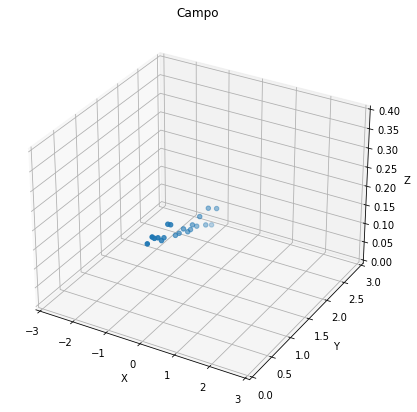

In [1191]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Estimando X em função de Y
Aqui tentaremos calcular X(y) utilizando regressão linear e polinomial

# Linear Regression Univariate

# Hipótese
  
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y$

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  


# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  

In [1192]:
def LinRegUni(t0A,t1A,alpha,m,X,Y,Jep):

    def h(t0,t1,y):
        x = t0 + t1*y 
        return x

    def Cost(t0,t1,X,Y,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,X,Y,m)

    listJ = [jA]
    delJ = Jep + 1
    
    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A, Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        jN = Cost(t0N,t1N,X,Y,m)
        listJ.append(jN)

        delJ= abs(jN - jA)

        t0A = t0N
        t1A = t1N
        jA = jN

    newX = []
    for i in range(m):
        newX.append(h(t0N,t1N,Y[i]))
    
    
    y = 2.1
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):
        soma += (newX[j] - X[j])**2
    msr = soma/m
 
    return listJ,newX,preX,preY,msr

In [1193]:
listJ,newX_yLin,preX_yLin,preY_yLin,msr = LinRegUni(0,0,0.1,20,X,Y,10**(-8))
print(msr)
print(len(listJ))

0.0009267413600372385
2228


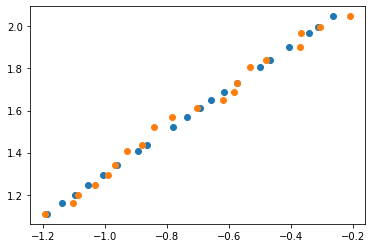

In [1194]:
plt.scatter(newX_yLin,Y)
plt.scatter(X,Y)
plt.show()

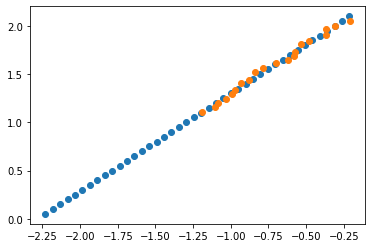

In [1195]:
plt.scatter(preX_yLin,preY_yLin)
plt.scatter(X,Y)
plt.show()

# Polynomial Regression Univariate

# Hipótese
  
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y + \theta_2 y^2$

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $
  

In [1196]:
def PolRegUni(t0A,t1A,t2A,alpha,m,X,Y,Jep):

    def h(t0,t1,t2,y):
        x = t0 + t1*y + t2*y**2
        return x

    def Cost(t0,t1,t2,X,Y,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]**2
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        jA = jN

    newX = []
    for i in range(m):
        newX.append(h(t0N,t1N,t2N,Y[i]))
    
    y = 2.1
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,t2N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):
        soma += (newX[j] - X[j])**2
    msr = soma/m
 
    return listJ,newX,preX,preY,msr

In [1197]:
listJ,newX_yPol,preX_yPol,preY_yPol,msr = PolRegUni(0,0,0,0.1,20,X,Y,10**(-7))
print(msr)
print(len(listJ))

0.0013388442366095478
405


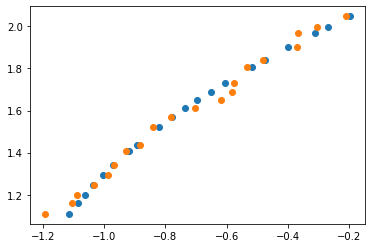

In [1198]:
plt.scatter(newX_yPol,Y)
plt.scatter(X,Y)
plt.show()

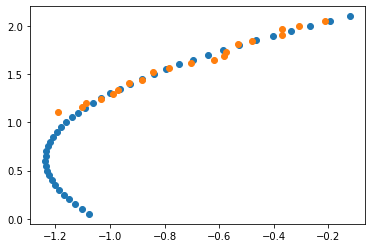

In [1199]:
plt.scatter(preX_yPol,preY_yPol)
plt.scatter(X,Y)
plt.show()

# Linear Regression Multivariate

# Hipótese
  
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

In [1200]:
def h(t0,t1,t2,x,y):
    z = t0 + t1*x + t2*y
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

In [1201]:
def LinRegMult(t0A,t1A,t2A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,x,y):
        z = t0 + t1*x + t2*y
        return z

    def Cost(t0,t1,t2,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.1,20,X,Y,10**(-7))

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,preX[i],preY[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m
 
    return listJ,newZ,preX,preY,preZ,msr

In [1202]:
listJ,newZ_LinMult,preX_LinMult,preY_LinMult,preZ_LinMult,msr = LinRegMult(0,0,0,0.1,20,X,Y,Z,10**(-10))
print(msr)
print(len(listJ))

0.0001951915097056711
274


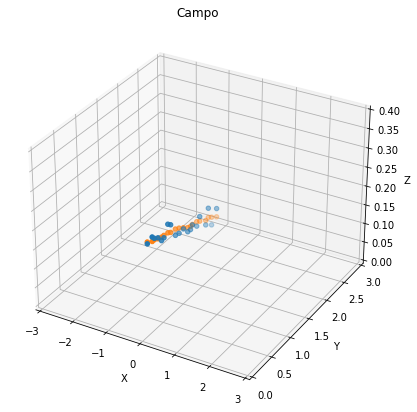

In [1203]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ_LinMult,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

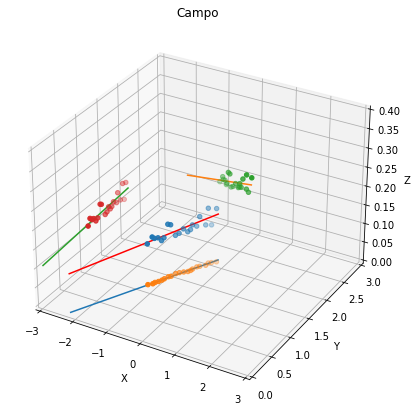

In [1204]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(preX_LinMult,preY_LinMult,preZ_LinMult,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(preX_LinMult, preY_LinMult, np.zeros(len(preZ_LinMult)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(preX_LinMult, np.ones(len(preY_LinMult)) * 3, preZ_LinMult)
ax.plot3D(np.ones(len(preX_LinMult)) * (-3), preY_LinMult, preZ_LinMult)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Polynomial Regression

In [1205]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

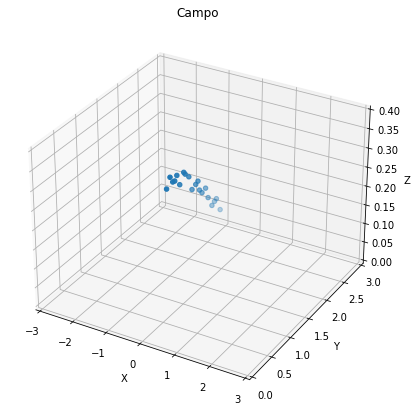

In [1206]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2$

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
  
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [1207]:
def PolRegMult1(t0A,t1A,t2A,t3A,t4A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,x,y):
        z = t0 + t1*x + t2*y + t3 * x**2 + t4 * y**2
        return z

    def Cost(t0,t1,t2,t3,t4,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]**2
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]**2
        t4N = t4A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,t3N,t4N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,X[i],Y[i]))

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.1,20,X,Y,10**(-7))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,msr

In [1208]:
listJ,newZ_PolMult1,preX_PolMult1,preY_PolMult1,preZ_PolMult1,msr = PolRegMult1(0,0,0,0,0,0.1,20,X,Y,Z,10**(-10))
print(msr)
print(len(listJ))

0.000143445294484938
22538


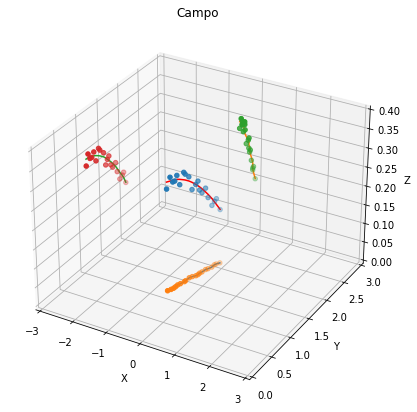

In [1209]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X, Y, newZ_PolMult1,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(X, Y, np.zeros(len(Z)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(X, np.ones(len(Y)) * 3, newZ_PolMult1)
ax.plot3D(np.ones(len(X)) * (-3), Y, newZ_PolMult1)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

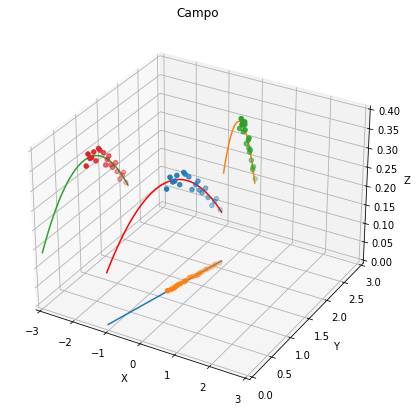

In [1210]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(preX_PolMult1,preY_PolMult1,preZ_PolMult1,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(preX_PolMult1, preY_PolMult1, np.zeros(len(preZ_PolMult1)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(preX_PolMult1, np.ones(len(preY_PolMult1)) * 3, preZ_PolMult1)
ax.plot3D(np.ones(len(preX_PolMult1)) * (-3), preY_PolMult1, preZ_PolMult1)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2$

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [1211]:
def PolRegMult2(t0A,t1A,t2A,t3A,t4A,t5A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,t5,x,y):
        z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2
        return z

    def Cost(t0,t1,t2,t3,t4,t5,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,t5,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,t5A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]**2
        t4N = t4A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]**2
        t5N = t5A - (alpha/m) * soma


        jN = Cost(t0N,t1N,t2N,t3N,t4N,t5N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        t5A = t5N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,X[i],Y[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.1,20,X,Y,10**(-7))

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,msr

In [1212]:
listJ,newZ_PolMult2,preX_PolMult2,preY_PolMult2,preZ_PolMult2,msr = PolRegMult2(0,0,0,0,0,0,0.1,20,X,Y,Z,10**(-10))
print(msr)
print(len(listJ))

0.00014184376152285384
19912


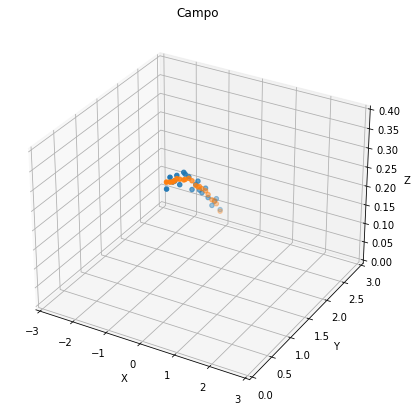

In [1213]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ_PolMult2,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

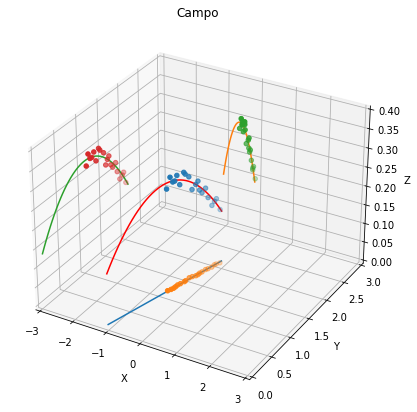

In [1214]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(preX_PolMult2,preY_PolMult2,preZ_PolMult2,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(preX_PolMult2, preY_PolMult2, np.zeros(len(preZ_PolMult2)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(preX_PolMult2, np.ones(len(preY_PolMult2)) * 3, preZ_PolMult2)
ax.plot3D(np.ones(len(preX_PolMult2)) * (-3), preY_PolMult2, preZ_PolMult2)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2 + \theta_6 x^2y + \theta_7 xy^2 + \theta_8 x^2y^2$

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $ \frac{\partial}{\partial \theta_6} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $ \frac{\partial}{\partial \theta_7} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $ \frac{\partial}{\partial \theta_8} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $\theta_{6} := \theta_{6} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $\theta_{7} := \theta_{7} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $\theta_{8} := \theta_{8} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

In [1215]:
def PolRegMult3(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,t5,t6,t7,t8,x,y):
        z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2 + t6 * x**2 * y + t7 * x * y**2 + t8 * x**2 * y**2
        return z

    def Cost(t0,t1,t2,t3,t4,t5,t6,t7,t8,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,t5,t6,t7,t8,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X,Y,Z,m)

    listJ = [jA]
    delJ = Jep +1

    while(delJ > Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i]**2)
        t4N = t4A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**2)
        t5N = t5A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * Y[i])
        t6N = t6A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i] * (Y[i]**2))
        t7N = t7A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * (Y[i]**2))
        t8N = t8A - (alpha/m) * soma


        jN = Cost(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X,Y,Z,m)
        listJ.append(jN)

        delJ = abs(jN-jA)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        t5A = t5N
        t6A = t6N
        t7A = t7N
        t8A = t8N
        jA = jN

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X[i],Y[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    msr = soma/m

    listJNot,newXNot,preX,preY,msrNot = LinRegUni(0,0,0.1,20,X,Y,10**(-7))

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,msr

In [1216]:
listJ,newZ_PolMult2,preX_PolMult2,preY_PolMult2,preZ_PolMult2,msr = PolRegMult3(0,0,0,0,0,0,0,0,0,0.1,20,X,Y,Z,10**(-10))
print(msr)
print(len(listJ))

0.00013860351552463261
31316


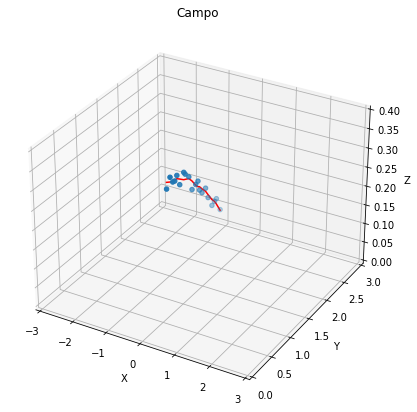

In [1217]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X,Y,newZ_PolMult2,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

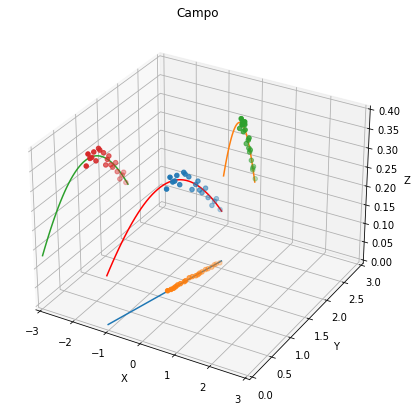

In [1218]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(preX_PolMult2,preY_PolMult2,preZ_PolMult2,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(preX_PolMult2, preY_PolMult2, np.zeros(len(preZ_PolMult2)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(preX_PolMult2, np.ones(len(preY_PolMult2)) * 3, preZ_PolMult2)
ax.plot3D(np.ones(len(preX_PolMult2)) * (-3), preY_PolMult2, preZ_PolMult2)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

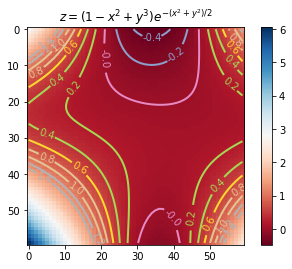

In [1219]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X,Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

<ipython-input-1220-0e2361366ceb>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


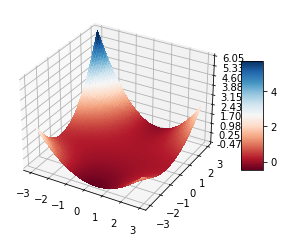

In [1220]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()